In [143]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.patches import Rectangle

In [144]:
pitches = pd.read_csv("/Users/chenghaoren/Desktop/MLB/2019_pitches.csv") #Includes pitch types,location,outcome for every pitch etc.
at_bats = pd.read_csv("/Users/chenghaoren/Desktop/MLB/2019_atbats.csv") 

In [145]:
pitches.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.00,2.15,88.8,80.7,placeholder,placeholder,22.8,4.8,24.0,-8.47,...,5,0.0,2.019000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.34,2.31,89.9,81.8,placeholder,placeholder,22.8,3.6,24.0,-7.10,...,8,0.0,2.019000e+09,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.05,2.03,85.7,79.6,placeholder,placeholder,9.6,6.0,24.0,3.65,...,9,0.0,2.019000e+09,0.0,0.0,1.0,2.0,0.0,0.0,0.0
3,0.49,0.92,85.4,78.5,placeholder,placeholder,24.0,7.2,24.0,-13.77,...,10,0.0,2.019000e+09,0.0,1.0,1.0,3.0,0.0,0.0,0.0
4,-0.13,1.11,84.6,77.6,placeholder,placeholder,26.4,8.4,24.0,-15.99,...,11,0.0,2.019000e+09,1.0,1.0,1.0,4.0,0.0,0.0,0.0


In [146]:
at_bats.head()

,inning,top,ab_id,g_id,p_score,batter_id,pitcher_id,stand,p_throws,event,o
0,1.0,1.0,2.019000e+09,201900001.0,0.0,594777,571666,L,R,Flyout,1
1,1.0,1.0,2.019000e+09,201900001.0,0.0,545361,571666,R,R,Flyout,2
2,1.0,1.0,2.019000e+09,201900001.0,0.0,571506,571666,L,R,Groundout,3
3,1.0,0.0,2.019000e+09,201900001.0,0.0,543257,502239,L,R,Single,0
4,1.0,0.0,2.019000e+09,201900001.0,0.0,656305,502239,R,R,Flyout,1


In [147]:
outs = ['Flyout','Groundout','Pop Out','Forceout','Sac Fly','Lineout','Fielders Choice Out','Homerun','Grounded Into DP','Bunt Groundout','Bunt Lineout','Sac Fly Double Play']
ground = ['Groundout','Forceout','Fielders Choice Out','Grounded Into DP','Bunt Groundout'] #Any outcome that involves a groundball
air = ['Flyout','Pop Out','Sac Fly','Lineout','Homerun','Bunt Lineout','Sac Fly Double Play'] #Any outcome that involves a flyball
results_groundballs = at_bats[at_bats['event'].isin(ground)]
results_flyballs = at_bats[at_bats['event'].isin(air)]
results = at_bats[at_bats['event'].isin(outs)] #For plotting purposes later

In [148]:
results_groundballs

,inning,top,ab_id,g_id,p_score,batter_id,pitcher_id,stand,p_throws,event,o
2,1.0,1.0,2.019000e+09,201900001.0,0.0,571506,571666,L,R,Groundout,3
5,1.0,0.0,2.019000e+09,201900001.0,0.0,572039,502239,R,R,Forceout,2
7,2.0,1.0,2.019000e+09,201900001.0,0.0,592743,571666,R,R,Groundout,1
22,3.0,0.0,2.019000e+09,201900001.0,0.0,501981,502239,R,R,Fielders Choice Out,2
25,4.0,1.0,2.019000e+09,201900001.0,2.0,571506,571666,L,R,Groundout,1
...,...,...,...,...,...,...,...,...,...,...,...
185232,7.0,0.0,2.019185e+09,201902408.0,1.0,642133,656222,L,L,Groundout,3
185236,8.0,1.0,2.019185e+09,201902408.0,4.0,542583,571882,R,R,Groundout,3
185241,8.0,0.0,2.019185e+09,201902408.0,1.0,620446,656222,R,L,Forceout,3
185242,9.0,1.0,2.019185e+09,201902408.0,4.0,663993,571704,L,R,Groundout,1


In [149]:
pitchTypes_ground = pitches[((pitches['code']=='X') | (pitches['code'] == 'E')) & pitches['ab_id'].isin(results_groundballs['ab_id'])]
pitchTypes_air = pitches[((pitches['code']=='X') | (pitches['code'] == 'E')) & pitches['ab_id'].isin(results_flyballs['ab_id'])]
pitchTypes_total = pitches[((pitches['code']=='X') | (pitches['code'] == 'E')) & pitches['ab_id'].isin(results['ab_id'])]

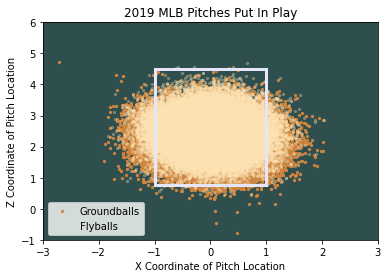

In [150]:
ax = plt.gca()
pitchTypes_ground.plot(kind='scatter',s = 5, x='px',y='pz',color='peru',ax = ax,label = 'Groundballs')
pitchTypes_air.plot(kind='scatter',s = 5,x='px',y='pz',color='moccasin',ax = ax,label = 'Flyballs',alpha = 0.3)
ax.set_facecolor('white')
ax.add_patch(Rectangle((-1, 0.75), 2, 3.75, fill=False, edgecolor= "lavender", lw = 3))
ax.set_facecolor('darkslategray')
plt.xlim(-3,3)
plt.ylim(-1,6)
plt.legend(loc = 'lower left')
plt.title("2019 MLB Pitches Put In Play")
plt.xlabel('X Coordinate of Pitch Location')
plt.ylabel('Z Coordinate of Pitch Location')
plt.show()
#plt.savefig('/Users/chenghaoren/Documents/Pitt/2022 Fall/Information Visualization/MLB.jpg')

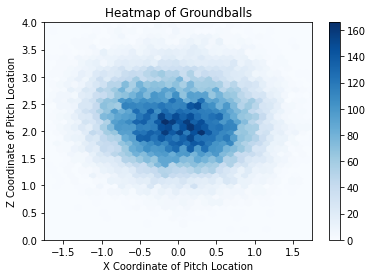

In [151]:
pitchTypes_ground.plot(kind = 'hexbin',x='px',y='pz',gridsize= 50,sharex = False,cmap=plt.cm.Blues)
plt.title("Heatmap of Groundballs")
plt.xlabel("X Coordinate of Pitch Location")
plt.ylabel("Z Coordinate of Pitch Location")
plt.xlim(-1.75,1.75)
plt.ylim(0,4)
plt.show()
#plt.savefig('/Users/chenghaoren/Documents/Pitt/2022 Fall/Information Visualization/MLB1.jpg')

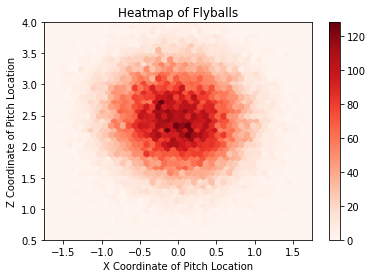

In [152]:
pitchTypes_air.plot(kind = 'hexbin',x='px',y='pz',gridsize= 50,sharex = False,cmap=plt.cm.Reds)
plt.title("Heatmap of Flyballs")
plt.xlabel("X Coordinate of Pitch Location")
plt.ylabel("Z Coordinate of Pitch Location")
plt.xlim(-1.75,1.75)
plt.ylim(0.5,4)
plt.show()
#plt.savefig('/Users/chenghaoren/Documents/Pitt/2022 Fall/Information Visualization/MLB2.jpg')